## Data Extraction from IFC
It is a example of how to use ifcOpenShell-Python to extract building information from an IFC-based BIM model.
Please check more details from https://ifcopenshell.org/

### Installation
At the very first begin, you need to setup a python environment on your system. 

You can find the multi-methods about IfcOpenShell installation from the doc: https://blenderbim.org/docs-python/ifcopenshell-python/installation.html

Also, Please using pip to download, please input following command in your terminal:

<b>pip install ifcopenshell</b>

In [8]:
! pip install ifcopenshell

'pip' is not recognized as an internal or external command,
operable program or batch file.


### Import library and Load the model

Please download the Barn.ifc from Barn folder in BIM models folder. 

Save the Barn.ifc  to a folder of your choice


In [8]:
import ifcopenshell

model = ifcopenshell.open('C:\\Users\\Aiyu\\Desktop\\Barn.ifc')

### Get the properties of a building element

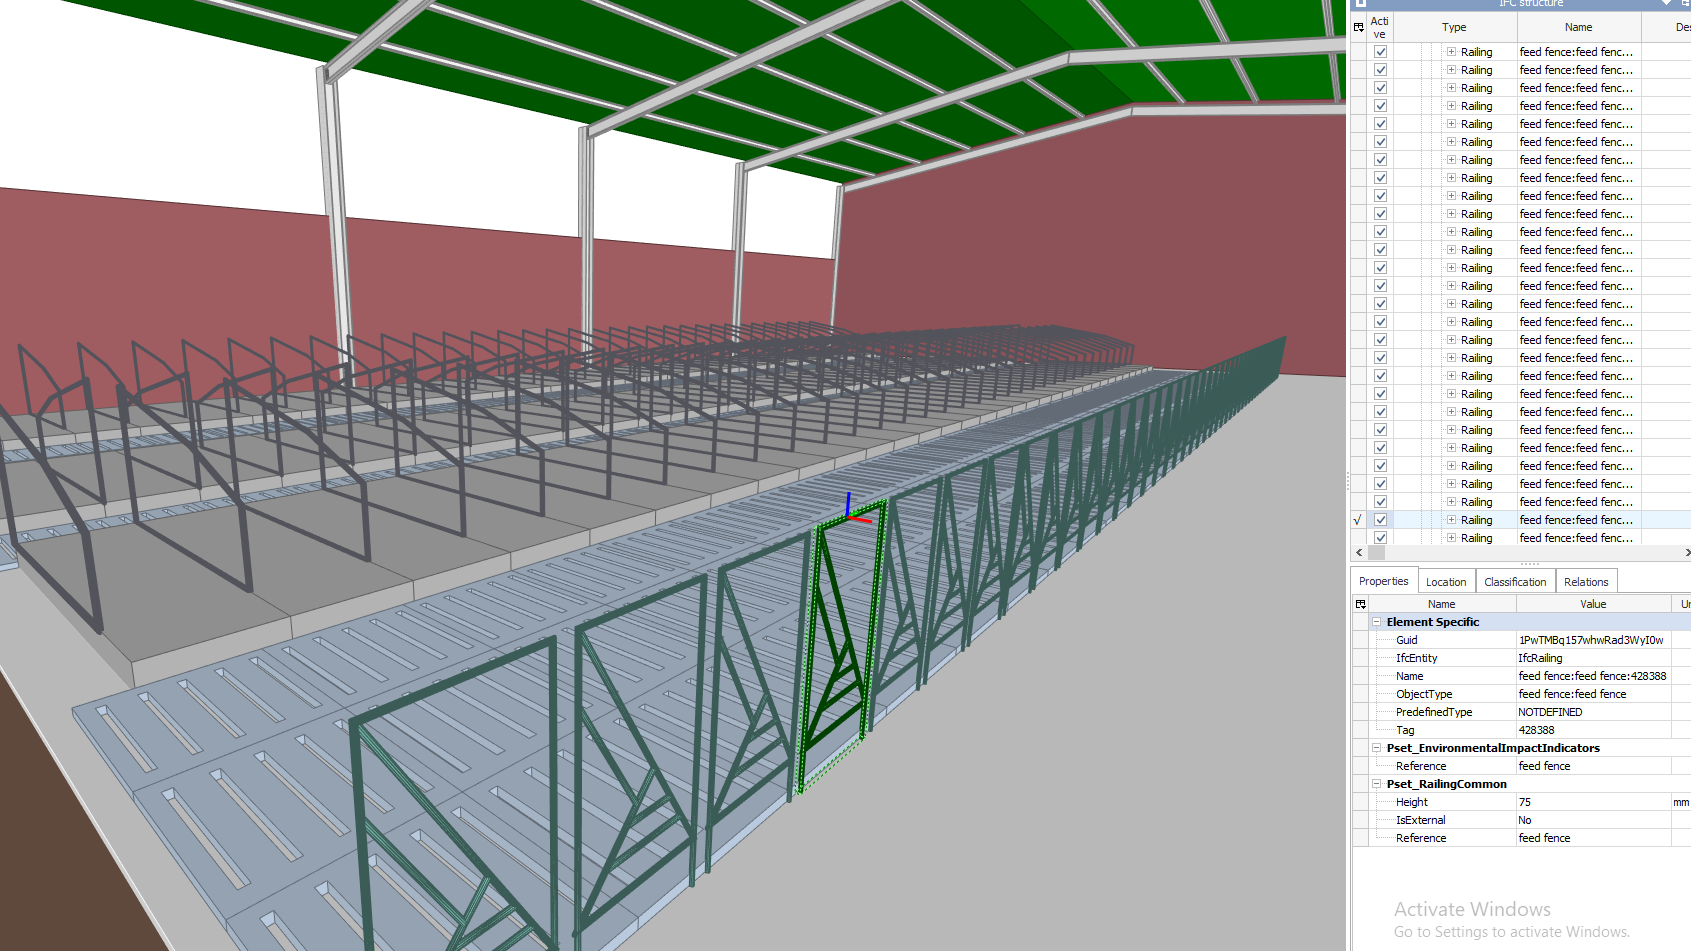

1. Let's try to get the properties of this fence

In [15]:
# query this fence by guid
fence = model.by_guid('1PwTMBq157whwRad3WyI0w')

# Gives us a dictionary of attributes, such as:
print(fence.get_info())

{'id': 38597, 'type': 'IfcRailing', 'GlobalId': '1PwTMBq157whwRad3WyI0w', 'OwnerHistory': #42=IfcOwnerHistory(#39,#5,$,.NOCHANGE.,$,$,$,1669979581), 'Name': 'feed fence:feed fence:428388', 'Description': None, 'ObjectType': 'feed fence:feed fence', 'ObjectPlacement': #38596=IfcLocalPlacement(#149,#38595), 'Representation': #38590=IfcProductDefinitionShape($,$,(#38588)), 'Tag': '428388', 'PredefinedType': 'NOTDEFINED'}


2. Let's get the location information of this fence

In [11]:
# Also import numpy and ifcopenshell.util.placement
! pip install numpy
import numpy
import ifcopenshell.util.placement

# This returns a 4x4 matrix, including the location and rotation. For example:
# array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, 2.00000000e+00],
#        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, 3.00000000e+00],
#        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, 5.00000000e+00],
#        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, 1.00000000e+00]])
matrix = ifcopenshell.util.placement.get_local_placement(fence.ObjectPlacement)
# The last column holds the XYZ values, such as:
# [42142.81605485 -7763.76420639     0.        ]
print(matrix[:,3][:3])

ModuleNotFoundError: No module named 'numpy'

3. Let's get the geometry of this fence

In [12]:
# Also import ifcopenshell.geom
import ifcopenshell.geom

settings = ifcopenshell.geom.settings()
shape = ifcopenshell.geom.create_shape(settings, fence)

# A 4x4 matrix representing the location and rotation of the element, in the form:
# [ [ x_x, y_x, z_x, x   ]
#   [ x_y, y_y, z_y, y   ]
#   [ x_z, y_z, z_z, z   ]
#   [ 0.0, 0.0, 0.0, 1.0 ] ]
# The position is given by the last column: (x, y, z)
# The rotation is described by the first three columns, by explicitly specifying the local X, Y, Z axes.
# The first column is a normalised vector of the local X axis: (x_x, x_y, x_z)
# The second column is a normalised vector of the local Y axis: (y_x, y_y, y_z)
# The third column is a normalised vector of the local Z axis: (z_x, z_y, z_z)
# The axes follow a right-handed coordinate system.
# Objects are never scaled, so the scale factor of the matrix is always 1.
matrix = shape.transformation.matrix.data

# Indices of vertices per triangle face e.g. [f1v1, f1v2, f1v3, f2v1, f2v2, f2v3, ...]
faces = shape.geometry.faces

# Indices of vertices per edge e.g. [e1v1, e1v2, e2v1, e2v2, ...]
edges = shape.geometry.edges

# X Y Z of vertices in flattened list e.g. [v1x, v1y, v1z, v2x, v2y, v2z, ...]
verts = shape.geometry.verts

# Since the lists are flattened, you may prefer to group them like so depending on your geometry kernel
grouped_verts = [[verts[i], verts[i + 1], verts[i + 2]] for i in range(0, len(verts), 3)]
grouped_edges = [[edges[i], edges[i + 1]] for i in range(0, len(edges), 2)]
grouped_faces = [[faces[i], faces[i + 1], faces[i + 2]] for i in range(0, len(faces), 3)]

# A list of styles that are relevant to this shape
styles = shape.geometry.materials

for style in styles:
    # Each style is named after the entity class if a default
    # material is applied. Otherwise, it is named "surface-style-{SurfaceStyle.name}"
    # All non-alphanumeric characters are replaced with a "-".
    print(style.original_name())

    # A more human readable name
    print(style.name)

    # Each style may have diffuse colour RGB codes
    if style.has_diffuse:
        print(style.diffuse)

    # Each style may have transparency data
    if style.has_transparency:
        print(style.transparency)

# Indices of material applied per triangle face e.g. [f1m, f2m, ...]
material_ids = shape.geometry.material_ids

NameError: name 'fence' is not defined

This example from IfcOpenShell-Python examples. For more usage, please check this link: https://blenderbim.org/docs-python/ifcopenshell-python.html

Also the IfcOpenShell-Python API is: https://blenderbim.org/docs-python/autoapi/ifcopenshell/index.html